#**Mounting the Google Drive**#

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**Importing the libraries**#

In [2]:
#Netflix dataset
#importing the necessary libraries for importing the dataset in jupyter notebook
#100M ratings 17770 movies 480,000 users 4 datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('/content/drive/MyDrive/combined_data_1.txt')
df

,,1:
1488844,3.0,2005-09-06
822109,5.0,2005-05-13
885013,4.0,2005-10-19
30878,4.0,2005-12-26
823519,3.0,2004-05-03
...,...,...
2591364,2.0,2005-02-16
1791000,2.0,2005-02-10
512536,5.0,2005-07-27
988963,3.0,2005-12-20


In [4]:
# selecting only necessary columns. since date is not needed it is excluded
df = pd.read_csv('/content/drive/MyDrive/combined_data_1.txt',header = None, names = ['Cust_Id', 'Rating'], usecols = [0,1])
df

,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0
...,...,...
24058258,2591364,2.0
24058259,1791000,2.0
24058260,512536,5.0
24058261,988963,3.0


In [5]:
# checking dtypes and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24058263 entries, 0 to 24058262
Data columns (total 2 columns):
 #   Column   Dtype  
---  ------   -----  
 0   Cust_Id  object 
 1   Rating   float64
dtypes: float64(1), object(1)
memory usage: 367.1+ MB


In [6]:
# finding distribution of rating
dist_rat=df.groupby('Rating').count()

In [7]:
dist_rat

,Cust_Id
Rating,
1.0,1118186
2.0,2439073
3.0,6904181
4.0,8085741
5.0,5506583


In [8]:
# finding no of movies
movie_count=df['Rating'].isna().sum()
movie_count

4499

In [9]:
#finding total no of ratings irrespective of duplicates
rating_count=df['Cust_Id'].count()-movie_count
rating_count

24053764

In [10]:
#finding no of unique users
cus_count=df['Cust_Id'].nunique()-movie_count
cus_count

470758

Text(0.5, 1.0, 'Total pool: 4499 Movies, 470758 customers, 24053764 ratings given')

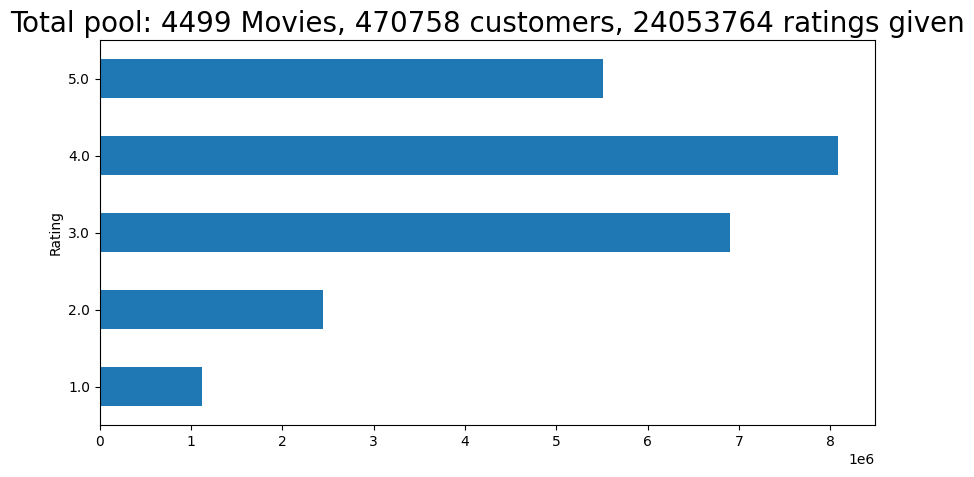

In [11]:
# plotting distribution of rating
fig= dist_rat.plot(kind = 'barh', legend = False, figsize = (10,5))
plt.title(f'Total pool: {movie_count} Movies, {cus_count} customers, {rating_count} ratings given', fontsize=20)

# creating a numpy array containing movie ids corresponding to the rows in the 'ratings' dataset

In [12]:
df_nan=pd.DataFrame(pd.isnull(df.Rating))
df_nan.value_counts()

Rating
False     24053764
True          4499
dtype: int64

# storing index of all movies having nan alues

In [13]:
df_nan=df_nan[df_nan['Rating']==True]

In [14]:
df_nan.shape

(4499, 1)

#resetting index for above data frame

In [15]:
df_nan=df_nan.reset_index()

In [16]:
df_nan

,index,Rating
0,0,True
1,548,True
2,694,True
3,2707,True
4,2850,True
...,...,...
4494,24046714,True
4495,24047329,True
4496,24056849,True
4497,24057564,True


# dividing movies and cus id into diff cols

In [17]:
df_nan['index'][:-1]#will extract all the records from the index column except for the last index-- 4498

0              0
1            548
2            694
3           2707
4           2850
          ...   
4493    24046583
4494    24046714
4495    24047329
4496    24056849
4497    24057564
Name: index, Length: 4498, dtype: int64

In [18]:
df_nan['index'][1:]#this sytax will extract records from the index column from the 1st index

1            548
2            694
3           2707
4           2850
5           3991
          ...   
4494    24046714
4495    24047329
4496    24056849
4497    24057564
4498    24057834
Name: index, Length: 4498, dtype: int64

In [19]:
#working
x=zip(df_nan['index'][1:], df_nan['index'][:-1])

In [20]:
x

In [21]:
tuple(x)

((548, 0),
 (694, 548),
 (2707, 694),
 (2850, 2707),
 (3991, 2850),
 (5011, 3991),
 (5105, 5011),
 (20016, 5105),
 (20112, 20016),
 (20362, 20112),
 (20561, 20362),
 (21108, 20561),
 (21234, 21108),
 (21353, 21234),
 (21644, 21353),
 (24344, 21644),
 (31453, 24344),
 (42176, 31453),
 (42716, 42176),
 (42833, 42716),
 (43052, 42833),
 (43256, 43052),
 (43872, 43256),
 (45206, 43872),
 (46414, 45206),
 (52276, 46414),
 (52550, 52276),
 (92303, 52550),
 (92827, 92303),
 (211241, 92827),
 (211463, 211241),
 (213318, 211463),
 (220209, 213318),
 (220318, 220209),
 (221158, 220318),
 (222098, 221158),
 (222380, 222098),
 (223183, 222380),
 (223936, 223183),
 (224428, 223936),
 (224522, 224428),
 (224651, 224522),
 (224757, 224651),
 (233259, 224757),
 (235879, 233259),
 (242438, 235879),
 (244789, 242438),
 (248381, 244789),
 (248613, 248381),
 (248942, 248613),
 (249033, 248942),
 (254181, 249033),
 (254296, 254181),
 (254456, 254296),
 (256863, 254456),
 (258697, 256863),
 (262260, 258697)

#**Framing a array that will have all the values of movies for each of the customer ratings**#

In [22]:
#now we will create a numpy array that will contain 1 from values 0 to 547, 2 from 548 to 693 and so on
movie_np = []
movie_id = 1

for i,j in zip(df_nan['index'][1:],df_nan['index'][:-1]):
    # numpy approach
    temp = np.full((1,i-j-1), movie_id)
    movie_np = np.append(movie_np, temp)
    movie_id += 1

# Account for last record and corresponding length
# numpy approach
last_record=np.full((1, abs(len(df)-df_nan.iloc[-1,0]-1)), movie_id) #**biggest error
movie_np=np.append(movie_np, last_record)
print(f'Movie numpy: {movie_np}')
print(f'Length: {len(movie_np)}')

Movie numpy: [1.000e+00 1.000e+00 1.000e+00 ... 4.499e+03 4.499e+03 4.499e+03]
Length: 24053764


In [23]:
movie_np[:15]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [24]:
last_record

array([[4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499,
        4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499,
        4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499,
        4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499,
        4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499,
        4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499,
        4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499,
        4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499,
        4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499,
        4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499,
        4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499,
        4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499,
        4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499,
        4499, 4499, 4499, 4499, 4499, 

In [25]:
# combining data together

In [26]:
# we do it by dropping nan values i.e. movie ids and add the new np array in place of it
df=df[pd.notnull(df['Rating'])] # non movies count
df.shape

(24053764, 2)

In [27]:
df.head()

,Cust_Id,Rating
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0
5,823519,3.0


In [28]:
df['MovieId']=movie_np.astype(int)
df.head()

<ipython-input-28-342f9b48f0e5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MovieId']=movie_np.astype(int)


,Cust_Id,Rating,MovieId
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
5,823519,3.0,1


In [29]:
df['Cust_Id']=df['Cust_Id'].astype(int)
df.head()

<ipython-input-29-6381f26ec53f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cust_Id']=df['Cust_Id'].astype(int)


,Cust_Id,Rating,MovieId
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
5,823519,3.0,1


In [30]:
# tip to ignore warnings like above*************************************
# use
import warnings
warnings.filterwarnings('ignore')
# now warnings will not be shown

In [31]:
df.tail()

,Cust_Id,Rating,MovieId
24058258,2591364,2.0,4499
24058259,1791000,2.0,4499
24058260,512536,5.0,4499
24058261,988963,3.0,4499
24058262,1704416,3.0,4499


# data cleaning

In [32]:
#now we will remove all the users that have rated less movies and
#also all those movies that has been rated less in numbers
f=['count','mean']

In [33]:
#To create a list of all the movies rated less often(only include top 30% rated movies)
dataset_movie_summary=df.groupby('MovieId').agg(f)
dataset_movie_summary

Cust_Id               Rating          
          count          mean  count      mean
MovieId                                       
1           547  1.249876e+06    547  3.749543
2           145  1.341926e+06    145  3.558621
3          2012  1.324290e+06   2012  3.641153
4           142  1.402854e+06    142  2.739437
5          1140  1.302384e+06   1140  3.919298
...         ...           ...    ...       ...
4495        614  1.321093e+06    614  3.478827
4496       9519  1.332006e+06   9519  3.763000
4497        714  1.330543e+06    714  2.715686
4498        269  1.262035e+06    269  2.464684
4499        428  1.270551e+06    428  2.614486

[4499 rows x 4 columns]

In [34]:
dataset_movie_summary=df.groupby('MovieId')['Rating'].agg(f)
dataset_movie_summary

,count,mean
MovieId,,
1,547,3.749543
2,145,3.558621
3,2012,3.641153
4,142,2.739437
5,1140,3.919298
...,...,...
4495,614,3.478827
4496,9519,3.763000
4497,714,2.715686


In [35]:
dataset_movie_summary.index # why to map index as int in below

Int64Index([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
            ...
            4490, 4491, 4492, 4493, 4494, 4495, 4496, 4497, 4498, 4499],
           dtype='int64', name='MovieId', length=4499)

In [36]:
# now we will store all the movie_id indexes in a variable dataset_movie_summary.index and convert the datatype to int
dataset_movie_summary.index=dataset_movie_summary.index.map(int)
dataset_movie_summary.index

Int64Index([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
            ...
            4490, 4491, 4492, 4493, 4494, 4495, 4496, 4497, 4498, 4499],
           dtype='int64', name='MovieId', length=4499)

In [37]:
# now we will create a benchmark like a threshold i.e. rounding values till top 70 %
movie_benchmark=round(dataset_movie_summary['count'].quantile(0.7),0)
print('Movie minimum times of review: {}'.format(movie_benchmark))

Movie minimum times of review: 1799.0


In [38]:
# drop list is created to drop records below benchmark
drop_movie_list=dataset_movie_summary[dataset_movie_summary['count']<movie_benchmark].index
drop_movie_list

Int64Index([   1,    2,    4,    5,    6,    7,    9,   10,   11,   12,
            ...
            4484, 4486, 4487, 4489, 4491, 4494, 4495, 4497, 4498, 4499],
           dtype='int64', name='MovieId', length=3149)

In [39]:
#now we will remove all the users that are in-active
dataset_cust_summary=df.groupby('Cust_Id')['Rating'].agg(f)
dataset_cust_summary

,count,mean
Cust_Id,,
6,153,3.333333
7,195,4.066667
8,21,4.000000
10,49,3.346939
25,4,3.500000
...,...,...
2649404,12,4.083333
2649409,10,4.000000
2649421,3,5.000000


In [40]:
dataset_cust_summary.index

Int64Index([      6,       7,       8,      10,      25,      33,      42,
                 59,      79,      83,
            ...
            2649378, 2649379, 2649384, 2649388, 2649401, 2649404, 2649409,
            2649421, 2649426, 2649429],
           dtype='int64', name='Cust_Id', length=470758)

In [41]:
dataset_cust_summary.index=dataset_cust_summary.index.map(int)
dataset_cust_summary.index

Int64Index([      6,       7,       8,      10,      25,      33,      42,
                 59,      79,      83,
            ...
            2649378, 2649379, 2649384, 2649388, 2649401, 2649404, 2649409,
            2649421, 2649426, 2649429],
           dtype='int64', name='Cust_Id', length=470758)

In [42]:
cust_benchmark=round(dataset_cust_summary['count'].quantile(0.7),0)
print('Cus with minimum review: {}'.format(cust_benchmark))

Cus with minimum review: 52.0


In [43]:
# customer drop list
drop_cust_list=dataset_cust_summary[dataset_cust_summary['count']<cust_benchmark].index
drop_cust_list

Int64Index([      8,      10,      25,      33,      42,      59,      83,
                 87,      94,     116,
            ...
            2649343, 2649351, 2649375, 2649376, 2649379, 2649384, 2649401,
            2649404, 2649409, 2649421],
           dtype='int64', name='Cust_Id', length=327300)

In [44]:
#we will remove all the customers and movies that are below the benchmark
print('The original dataframe has: ', df.shape, 'shape')

The original dataframe has:  (24053764, 3) shape


In [45]:
df=df[~df['MovieId'].isin(drop_movie_list)]
#~ symbol will not include the true values coming from the isin()
df=df[~df['Cust_Id'].isin(drop_cust_list)]
print('After the triming, the shape is: {}'.format(df.shape))

After the triming, the shape is: (17337458, 3)


In [46]:
df.head()

,Cust_Id,Rating,MovieId
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3


In [47]:
df.Rating.value_counts()

4.0    5901368
3.0    5185650
5.0    3769803
2.0    1759281
1.0     721356
Name: Rating, dtype: int64

# creating a rating matrix using pivot tables

In [48]:
df_pivot=pd.pivot_table(df,values='Rating',index='Cust_Id',columns='MovieId')

In [49]:
df_pivot
# we get the ratings given by a customer for the movies they watched and for remaining null

MovieId,3,8,16,17,18,26,28,30,32,33,...,4472,4474,4478,4479,4485,4488,4490,4492,4493,4496
Cust_Id,,,,,,,,,,,,,,,,,,,,,
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,5.0,NaN,NaN,NaN,NaN,4.0,5.0,NaN,NaN,...,3.0,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN
79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,...,4.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN
97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
134,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2649370,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2649378,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2649388,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,...,3.0,NaN,NaN,3.0,NaN,3.0,NaN,NaN,NaN,NaN


# loading titles dataset

In [48]:
df_title = pd.read_csv('/content/drive/MyDrive/Copy of movie_titles - movie_titles.csv', header=None, usecols=[0,1,2], names=['MovieId','Year','Name' ])
df_title

,MovieId,Year,Name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [49]:
df_title.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17770 entries, 0 to 17769
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   MovieId  17770 non-null  int64  
 1   Year     17763 non-null  float64
 2   Name     17770 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 416.6+ KB


In [50]:
df_title['Name']=df_title['Name'].astype(str)
df_title.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17770 entries, 0 to 17769
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   MovieId  17770 non-null  int64  
 1   Year     17763 non-null  float64
 2   Name     17770 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 416.6+ KB


# combining original and movie data set we use scikit-surprise for SVD

In [51]:
# Import required libraries
import math
import re
import matplotlib.pyplot as plt

from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

In [52]:
# reader help us to read the dataset for svd algo
reader=Reader()
#we only work with top 100K rows for quick runtime
#data=Dataset.load_from_df(df[['Cust_Id','MovieId','Rating']][:100000], reader)
#data

In [63]:
svd=SVD()

In [55]:
#we compute RMSE(root mean sq error),MAE(mean absolute error) of SVD algo
cross_validate(svd, data, measures=['RMSE','MAE'], cv=3, verbose=True)
#cv=3 is making data into 3 folds

#verbose(int): If True accuracy measures for each split are printed,
#as well as train and test times. Averages and standard deviations
#over all splits are also reported. Default is False: nothing is printed.

# in the result thee fold with less RMSE is good and is considered

Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9959  1.0017  0.9940  0.9972  0.0033  
MAE (testset)     0.7991  0.8042  0.7951  0.7995  0.0037  
Fit time          2.20    2.16    1.39    1.92    0.38    
Test time         0.40    0.28    0.29    0.32    0.05    


{'test_rmse': array([0.99587872, 1.00173871, 0.99396419]),
 'test_mae': array([0.79913864, 0.80419058, 0.79513151]),
 'fit_time': (2.2012009620666504, 2.1609690189361572, 1.3854713439941406),
 'test_time': (0.40070581436157227, 0.2808525562286377, 0.29341793060302734)}

In [56]:
df.head()

,Cust_Id,Rating,MovieId
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3


In [53]:
# getting recommendations for this user
# finding movies rated 5 for 712664
#so first we take user 712664 and we try to recommend some movies based on the past data
df_712664=df[(df['Cust_Id'] ==712664)& (df['Rating']==5)]
df_712664

,Cust_Id,Rating,MovieId
696,712664,5.0,3
308787,712664,5.0,79
577555,712664,5.0,175
898451,712664,5.0,199
1019562,712664,5.0,241
...,...,...,...
20461546,712664,5.0,3887
21752209,712664,5.0,4109
22487781,712664,5.0,4266
23397883,712664,5.0,4384


In [54]:
df_712664=df_712664.set_index('MovieId')
df_712664

,Cust_Id,Rating
MovieId,,
3,712664,5.0
79,712664,5.0
175,712664,5.0
199,712664,5.0
241,712664,5.0
...,...,...
3887,712664,5.0
4109,712664,5.0
4266,712664,5.0


In [55]:
df_712664=df_712664.join(df_title)['Name']
df_712664

MovieId
3                            Paula Abdul's Get Up & Dance
79                                           Winter Kills
175     The History Channel Presents: Troy: Unearthing...
199                          The Fall of the Roman Empire
241        Neon Genesis Evangelion: The End of Evangelion
                              ...                        
3887                                  NYPD Blue: Season 2
4109                                               Dakota
4266                              The Sleeping Dictionary
4384                            Sharpe 5: Sharpe's Honour
4392                            The Mask: Special Edition
Name: Name, Length: 84, dtype: object

# Training SVd model to predict further ratings of user

In [56]:
#now we will build the recommendation algorithm
#first we will make a shallow copy of the movie_titles.csv file so that we can change the values in the copied dataset, not in the actual dataset

user_712664=df_title.copy()
user_712664

,MovieId,Year,Name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [57]:
user_712664=user_712664.reset_index()
user_712664

,index,MovieId,Year,Name
0,0,1,2003.0,Dinosaur Planet
1,1,2,2004.0,Isle of Man TT 2004 Review
2,2,3,1997.0,Character
3,3,4,1994.0,Paula Abdul's Get Up & Dance
4,4,5,2004.0,The Rise and Fall of ECW
...,...,...,...,...
17765,17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17766,17767,2004.0,Fidel Castro: American Experience
17767,17767,17768,2000.0,Epoch
17768,17768,17769,2003.0,The Company


In [58]:
#To remove all the movies rated less often
user_712664 = user_712664[~user_712664['MovieId'].isin(drop_movie_list)]
user_712664
# these are the movies that can be recommended

,index,MovieId,Year,Name
2,2,3,1997.0,Character
7,7,8,2004.0,What the #$*! Do We Know!?
15,15,16,1996.0,Screamers
16,16,17,2005.0,7 Seconds
17,17,18,1994.0,Immortal Beloved
...,...,...,...,...
17765,17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17766,17767,2004.0,Fidel Castro: American Experience
17767,17767,17768,2000.0,Epoch
17768,17768,17769,2003.0,The Company


In [59]:
# out of those all movies we should recommend based on movies he gave max star rating


In [60]:
#we now work with all rows
data=Dataset.load_from_df(df[['Cust_Id','MovieId','Rating']], reader)
data

In [61]:
#building the trainset using surprise package
trainset=data.build_full_trainset()
trainset

In [65]:
svd.fit(trainset)

In [66]:
user_712664['Estimate_Score']=user_712664['MovieId'].apply(lambda x: svd.predict(712664, x).est)
user_712664

#est' represents the estimated score or rating of a movie predicted by the SVD model for a given user.

,index,MovieId,Year,Name,Estimate_Score
2,2,3,1997.0,Character,4.777420
7,7,8,2004.0,What the #$*! Do We Know!?,2.545693
15,15,16,1996.0,Screamers,2.981550
16,16,17,2005.0,7 Seconds,2.687212
17,17,18,1994.0,Immortal Beloved,3.702250
...,...,...,...,...,...
17765,17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...,3.507743
17766,17766,17767,2004.0,Fidel Castro: American Experience,3.507743
17767,17767,17768,2000.0,Epoch,3.507743
17768,17768,17769,2003.0,The Company,3.507743


In [67]:
user_712664=user_712664.drop('MovieId', axis=1)

In [68]:
user_712664=user_712664.sort_values('Estimate_Score', ascending=False)
print(user_712664.head(10))

      index    Year                                      Name  Estimate_Score
3927   3927  2004.0                        Nip/Tuck: Season 2        5.000000
721     721  2003.0                        The Wire: Season 1        5.000000
4352   4352  2002.0            Curb Your Enthusiasm: Season 3        5.000000
1847   1847  1956.0  Samurai Trilogy 3: Duel at Ganryu Island        5.000000
1276   1276  1988.0                       Red Dwarf: Series 3        5.000000
1031   1031  1992.0                               Hard Boiled        5.000000
871     871  1954.0                             Seven Samurai        5.000000
222     222  2003.0                Chappelle's Show: Season 1        5.000000
174     174  1992.0                            Reservoir Dogs        4.976085
2101   2101  1994.0                    The Simpsons: Season 6        4.959058
